# Curso de Big Data. Otoño 2024 - Grupo 4
# Trabajo Práctico 3
## Integrantes: Federico Saucedo, Manuel Soares Gache y Maximiliano Cucher

# Parte I: Analizando la base

In [442]:
import pandas as pd
df = pd.read_excel('usu_individual_T423.xlsx')

## Ejercicio 2

### Inciso (a)

Lo primero que hacemos es buscar en el diccionario de variables con el nombre de “Diseno de registro y estructura para las bases preliminares (hogares y personas)” el codigo de Algomerado correspondiente con la Ciudad Autonoma de Buenos Aires y Gran Buenos Aires. 32 = Ciudad Autónoma de Buenos Aires; 33 = Partidos del GBA

In [446]:
# Códigos de aglomerado para Ciudad Autónoma de Buenos Aires y Gran Buenos Aires
codigos_buenos_aires = [32, 33]
# Filtrar los datos
df_a = df[df['AGLOMERADO'].isin(codigos_buenos_aires)]

### Inciso (b)

In [448]:
# Guarda el número de filas antes de aplicar el filtro
filas_originales = len(df_a)

# Selecciona solo las columnas que no son de tipo string
numeric_columns = df_a.select_dtypes(exclude=['object']).columns

# Filtra las filas que tienen valores negativos en las columnas numéricas
df_b = df_a[~df_a[numeric_columns].apply(lambda row: (row < 0).any(), axis=1)]

# Calcula el número de filas después de aplicar el filtro
filas_nuevas = len(df_b)

# Calcula cuántas filas se eliminaron
filas_eliminadas = filas_originales - filas_nuevas

# Muestra cuántas filas se eliminaron
print("Se eliminaron {} filas.".format(filas_eliminadas))

# Ahora 'df_b' contiene solo las observaciones sin valores negativos en las columnas numéricas,
# sin eliminar las filas que contienen valores faltantes



Se eliminaron 1411 filas.


### Inciso (c)

/var/folders/k9/h58qgqrs71b3f1ggm3tr7p0r0000gn/T/ipykernel_86304/2095933641.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='CH04', data=df_b, palette=['blue', 'red'], width=0.4)
/var/folders/k9/h58qgqrs71b3f1ggm3tr7p0r0000gn/T/ipykernel_86304/2095933641.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Varón', 'Mujer'])


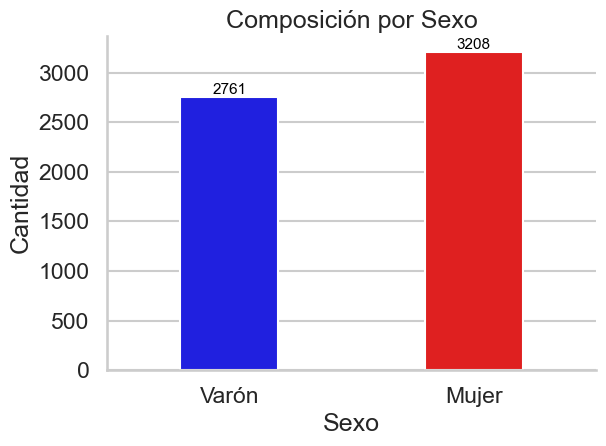

In [450]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de Seaborn
sns.set(style="whitegrid", context='talk')

# Crear un gráfico de barras para la distribución por sexo
# Especificar colores personalizados para cada sexo y ajustar el ancho de las barras
ax = sns.countplot(x='CH04', data=df_b, palette=['blue', 'red'], width=0.4)

# Establecer etiquetas y título
ax.set_xticklabels(['Varón', 'Mujer'])
ax.set_xlabel('Sexo')
ax.set_ylabel('Cantidad')
ax.set_title('Composición por Sexo')

# Añadir anotaciones con la cantidad exacta sobre cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Ajustes adicionales para mejorar la estética
plt.xticks(rotation=0)  # Asegurar que las etiquetas del eje x están correctamente alineadas
sns.despine()  # Quitar los bordes para un look más limpio

# Ajustar el diseño para evitar recortes en la exportación
plt.tight_layout()

# Guardar el gráfico con la máxima calidad posible
plt.savefig('grafico_c.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()


### Inciso (d)

Para este inciso replicamos el codigo que utilizamos en el TP2.

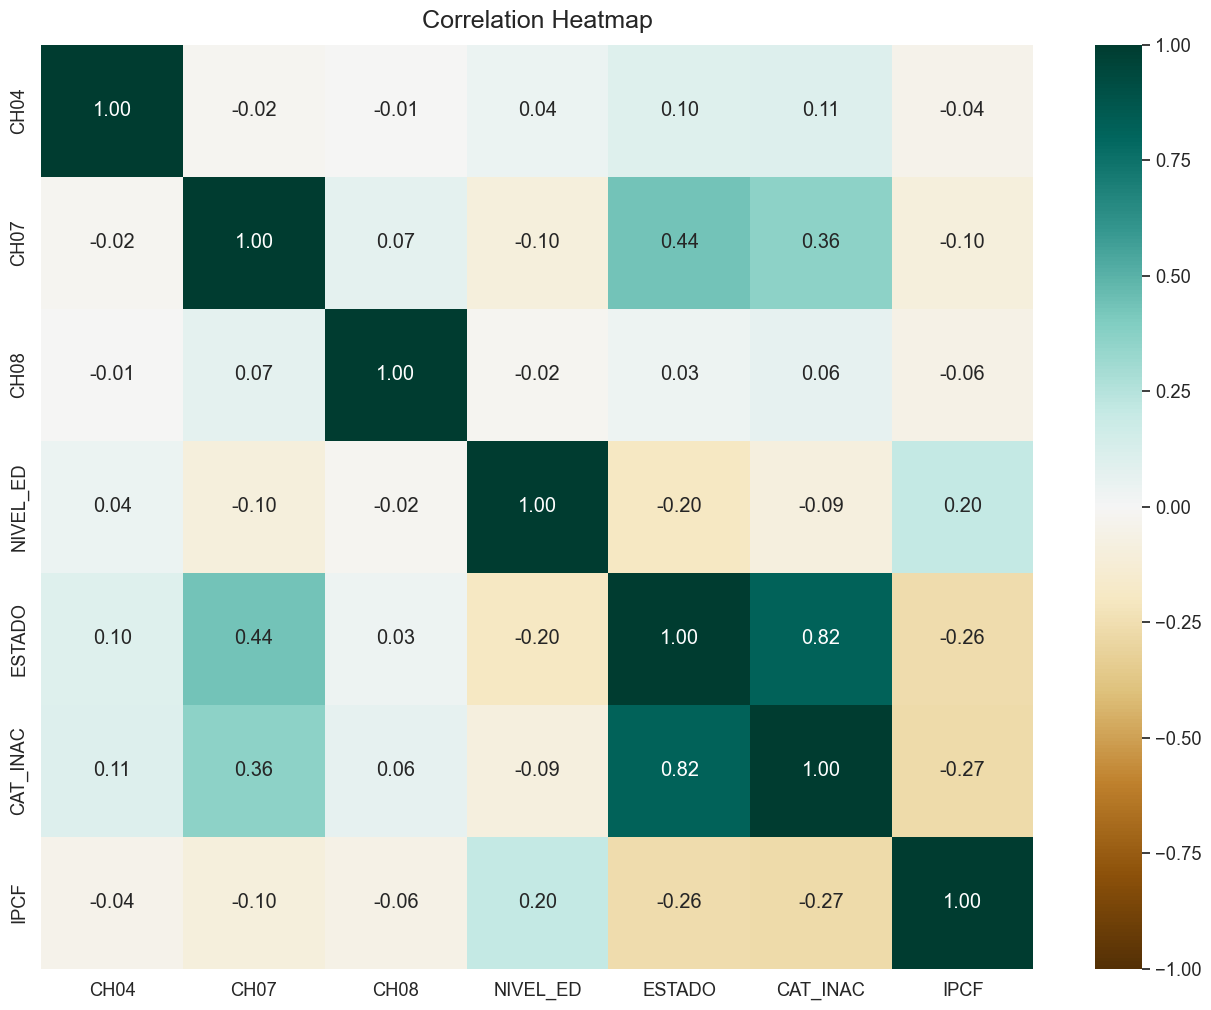

In [453]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las variables relevantes
selected_variables = ['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO',
                      'CAT_INAC', 'IPCF']

# Seleccionar solo las columnas necesarias del DataFrame limpio
selected_data = df_b[selected_variables]

# Calcular la matriz de correlación
correlation_matrix = selected_data.corr()

# Ajustar el tamaño del mapa de calor y la fuente de la anotación
plt.figure(figsize=(16, 12))
sns.set(font_scale=1.2)

# Crear el mapa de calor de la matriz de correlación
heatmap = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='BrBG', xticklabels=True, yticklabels=True)

# Añadir un título al mapa de calor
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

# Guardar el mapa de calor como un archivo PNG
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

### Inciso (e)

In [455]:
# Contar la cantidad de desocupados (valor 2 en la columna 'ESTADO')
desocupados = df_b[df_b['ESTADO'] == 2]['ESTADO'].count()

# Contar la cantidad de inactivos (valor 3 en la columna 'ESTADO')
inactivos = df_b[df_b['ESTADO'] == 3]['ESTADO'].count()

# Imprimir los resultados
print("Cantidad de desocupados en la muestra:", desocupados)
print("Cantidad de inactivos en la muestra:", inactivos)

Cantidad de desocupados en la muestra: 226
Cantidad de inactivos en la muestra: 2507


In [456]:
# Filtrar el DataFrame para incluir solo las filas con estado de "ocupado" (1)
ocupados = df_b[df_b['ESTADO'] == 1]
media_ipcf_ocupados = ocupados['IPCF'].mean()

# Filtrar el DataFrame para incluir solo las filas con estado de "desocupado" (2)
desocupados = df_b[df_b['ESTADO'] == 2]
media_ipcf_desocupados = desocupados['IPCF'].mean()

# Filtrar el DataFrame para incluir solo las filas con estado de "inactivo" (3)
inactivos = df_b[df_b['ESTADO'] == 3]
media_ipcf_inactivos = inactivos['IPCF'].mean()

# Imprimir los resultados
print("Media de IPCF para ocupados:", media_ipcf_ocupados)
print("Media de IPCF para desocupados:", media_ipcf_desocupados)
print("Media de IPCF para inactivos:", media_ipcf_inactivos)


Media de IPCF para ocupados: 190809.67828333334
Media de IPCF para desocupados: 61605.87442477877
Media de IPCF para inactivos: 93740.53313921022


### Inciso (f)

En este inciso se nos dificultaba mucho mergear los datos de tabla_adulto_equiv.xlsx por lo que, creamos 4 varibles a mano con los datos que tenia este archivo que se llaman "edad_min", "edad_max", "Mujeres" y "Varones" y luego en base a estas varaibes creamos la nueva columna.

In [459]:
# Crear un diccionario para la tabla de equivalencia por sexo y edad
adulto_equiv = {
    'edad_min': [0, 10, 18, 30, 46, 61, 76],
    'edad_max': [9, 17, 29, 45, 60, 75, 120],  # Uso 120 para cubrir todos hasta "más de 75 años"
    'Mujeres': [0.69, 0.77, 0.76, 0.77, 0.76, 0.67, 0.63],
    'Varones': [0.69, 1.04, 1.02, 1.00, 1.00, 0.83, 0.74]
}
tabla_equiv = pd.DataFrame(adulto_equiv)

# Función para buscar el equivalente de adulto basado en edad y sexo
def get_adulto_equiv(edad, sexo):
    # Filtrar por rango de edad
    row = tabla_equiv[(tabla_equiv['edad_min'] <= edad) & (tabla_equiv['edad_max'] >= edad)]
    if sexo == 1:  # Hombre
        return row['Varones'].values[0]
    else:  # Mujer
        return row['Mujeres'].values[0]

# Aplicar la función para crear la columna 'adulto_equiv'
df_b['adulto_equiv'] = df_b.apply(lambda row: get_adulto_equiv(row['CH06'], row['CH04']), axis=1)

# Sumar la columna 'adulto_equiv' para las personas que pertenecen al mismo hogar
# Asumiendo que hay una columna 'Hogar' que identifica cada hogar
df_b['ad_equiv_hogar'] = df_b.groupby('CODUSU')['adulto_equiv'].transform('sum')

# Mostrar el resultado
print(df_b[['CH06', 'CH04', 'adulto_equiv', 'ad_equiv_hogar']].head())

     CH06  CH04  adulto_equiv  ad_equiv_hogar
109    76     1          0.74            1.37
110    79     2          0.63            1.37
111    65     1          0.83            5.71
112    66     2          0.67            5.71
113    49     2          0.76            2.82


/var/folders/k9/h58qgqrs71b3f1ggm3tr7p0r0000gn/T/ipykernel_86304/3942211376.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['adulto_equiv'] = df_b.apply(lambda row: get_adulto_equiv(row['CH06'], row['CH04']), axis=1)
/var/folders/k9/h58qgqrs71b3f1ggm3tr7p0r0000gn/T/ipykernel_86304/3942211376.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['ad_equiv_hogar'] = df_b.groupby('CODUSU')['adulto_equiv'].transform('sum')


## Ejercicio 3

In [461]:
# Contar la cantidad de ceros en la columna 'ITF'
cantidad_de_ceros_ITF = (df_b['ITF'] == 0).sum()

# Imprimir la cantidad de ceros
print("Cantidad de ceros en la variable 'ITF':", cantidad_de_ceros_ITF)


Cantidad de ceros en la variable 'ITF': 1618


In [462]:
# Crear una base de datos con las observaciones donde se respondió la pregunta sobre ITF
respondieron = df_b[df_b['ITF'] != 0]

# Crear una base de datos con las observaciones donde no se respondió la pregunta sobre ITF
norespondieron = df_b[df_b['ITF'] == 0]

# Guardar las bases de datos en archivos separados
respondieron.to_excel('respondieron.xlsx', index=False)
norespondieron.to_excel('norespondieron.xlsx', index=False)

# Mostrar un mensaje de confirmación
print("Se han guardado las observaciones en archivos 'respondieron.xlsx' y 'norespondieron.xlsx' correctamente.")

Se han guardado las observaciones en archivos 'respondieron.xlsx' y 'norespondieron.xlsx' correctamente.


In [463]:
# Valor de la Canasta Básica Total para un adulto equivalente
canasta_basica_total = 132853.3

# Calcular el ingreso necesario para cada hogar
respondieron['ingreso_necesario'] = canasta_basica_total * respondieron['ad_equiv_hogar']

# Mostrar las primeras filas del DataFrame con la nueva columna
print(respondieron.head())


                            CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
109  TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           1   
110  TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           2   
113  TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           1   
114  TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           2   
115  TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           3   

     H15  REGION MAS_500  AGLOMERADO  PONDERA  ...  DECCFR  IDECCFR RDECCFR  \
109    1       1       S          32     1775  ...       8      NaN       8   
110    1       1       S          32     1775  ...       8      NaN       8   
113    1       1       S          32     3129  ...       9      NaN       8   
114    1       1       S          32     3129  ...       9      NaN       8   
115    1       1       S          32     3129  ...       9      NaN       8   

     GDECCFR  PDECCFR  ADECCFR  PONDIH  adulto_equiv  ad

/var/folders/k9/h58qgqrs71b3f1ggm3tr7p0r0000gn/T/ipykernel_86304/4074562261.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['ingreso_necesario'] = canasta_basica_total * respondieron['ad_equiv_hogar']


In [464]:
# Agregar la columna "pobre" con valor 1 si ITF es menor al ingreso necesario, y 0 en caso contrario
respondieron['pobre'] = (respondieron['ITF'] < respondieron['ingreso_necesario']).astype(int)

# Calcular la cantidad de personas identificadas como pobres
cantidad_de_pobres = respondieron['pobre'].sum()

# Mostrar las primeras filas del DataFrame con la nueva columna
print(respondieron.head())

# Imprimir la cantidad de pobres identificados
print("Cantidad de personas identificadas como pobres:", cantidad_de_pobres)

                            CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
109  TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           1   
110  TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           2   
113  TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           1   
114  TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           2   
115  TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           3   

     H15  REGION MAS_500  AGLOMERADO  PONDERA  ...  IDECCFR  RDECCFR GDECCFR  \
109    1       1       S          32     1775  ...      NaN        8     8.0   
110    1       1       S          32     1775  ...      NaN        8     8.0   
113    1       1       S          32     3129  ...      NaN        8     8.0   
114    1       1       S          32     3129  ...      NaN        8     8.0   
115    1       1       S          32     3129  ...      NaN        8     8.0   

     PDECCFR  ADECCFR  PONDIH  adulto_equiv  ad_eq

/var/folders/k9/h58qgqrs71b3f1ggm3tr7p0r0000gn/T/ipykernel_86304/1738183665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pobre'] = (respondieron['ITF'] < respondieron['ingreso_necesario']).astype(int)


# Parte II: Clasificación

## Ejercicio 1

In [467]:
# Lista de variables relacionadas con ingresos y columnas adicionales a eliminar
columnas_a_eliminar1 = ['PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2', 'PP08J3', 
                       'P21', 'DECOCUR', 'IDECOCUR', 'RDECOCUR', 'GDECOCUR', 'PDECOCUR', 
                       'ADECOCUR', 'PONDIIO', 'TOT_P12', 'P47T', 'DECINDR', 'IDECINDR', 
                       'RDECINDR', 'GDECINDR', 'PDECINDR', 'ADECINDR', 'PONDII', 'V2_M', 
                       'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 
                       'V18_M', 'V19_AM', 'V21_M', 'T_VI', 'ITF', 'DECIFR', 'IDECIFR', 
                       'RDECIFR', 'GDECIFR', 'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 
                       'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR', 'PONDIH',
                       'adulto_equiv', 'ad_equiv_hogar', 'ingreso_necesario']

columnas_a_eliminar2 = ['PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2', 'PP08J3', 
                       'P21', 'DECOCUR', 'IDECOCUR', 'RDECOCUR', 'GDECOCUR', 'PDECOCUR', 
                       'ADECOCUR', 'PONDIIO', 'TOT_P12', 'P47T', 'DECINDR', 'IDECINDR', 
                       'RDECINDR', 'GDECINDR', 'PDECINDR', 'ADECINDR', 'PONDII', 'V2_M', 
                       'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 
                       'V18_M', 'V19_AM', 'V21_M', 'T_VI', 'ITF', 'DECIFR', 'IDECIFR', 
                       'RDECIFR', 'GDECIFR', 'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 
                       'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR', 'PONDIH',
                       'adulto_equiv', 'ad_equiv_hogar']
# Eliminar las columnas especificadas de la base 'respondieron'
respondieron = respondieron.drop(columns=columnas_a_eliminar1)

# Eliminar las columnas especificadas de la base 'norespondieron'
norespondieron = norespondieron.drop(columns=columnas_a_eliminar2)

# Mostrar las primeras filas de las bases de datos después de eliminar las columnas
print("Bases de datos 'respondieron' después de eliminar columnas:")
print(respondieron.head())
print("\nBases de datos 'norespondieron' después de eliminar columnas:")
print(norespondieron.head())


Bases de datos 'respondieron' después de eliminar columnas:
                            CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
109  TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           1   
110  TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           2   
113  TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           1   
114  TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           2   
115  TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           3   

     H15  REGION MAS_500  AGLOMERADO  PONDERA  ...  PP11L1  PP11M PP11N  \
109    1       1       S          32     1775  ...     NaN    NaN   NaN   
110    1       1       S          32     1775  ...     NaN    NaN   NaN   
113    1       1       S          32     3129  ...     NaN    NaN   NaN   
114    1       1       S          32     3129  ...     NaN    NaN   NaN   
115    1       1       S          32     3129  ...     NaN    NaN   NaN   

     PP11O  PP11P  P

## Ejercicio 2

In [469]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Suponiendo que 'respondieron' ya está cargado y preparado
# Definir la variable dependiente 'y' y las independientes 'X'
X = respondieron.drop(columns=['pobre'])  # Elimina la variable dependiente de X
y = respondieron['pobre']  # Establece 'pobre' como la variable dependiente

# Agregar la columna de unos a 'X' para el término intercepto
X = np.hstack([np.ones((X.shape[0], 1)), X.values])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Mostrar las dimensiones de los conjuntos de datos para verificar
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

## Ejercicio 3

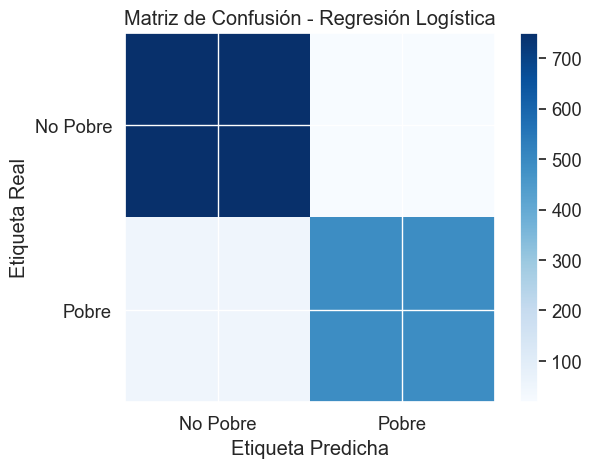

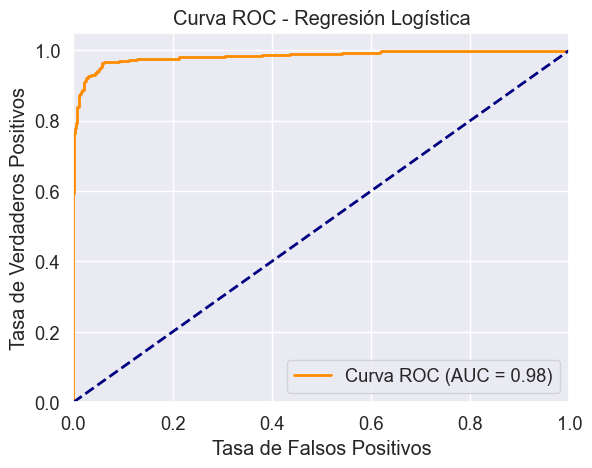

AUC (Regresión Logística): 0.9834654306906598
Precisión (Accuracy) (Regresión Logística): 0.9502297090352221


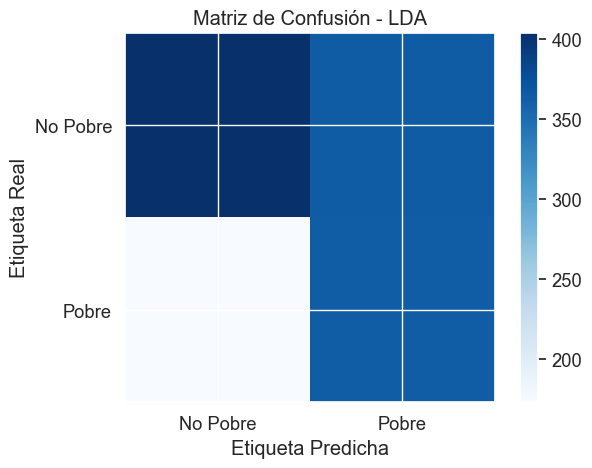

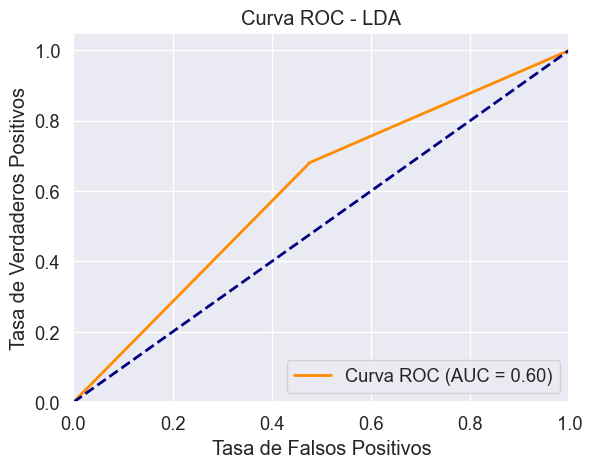

AUC (Análisis de Discriminante Lineal): 0.6020878889365133
Precisión (Accuracy) (Análisis de Discriminante Lineal): 0.5880551301684533


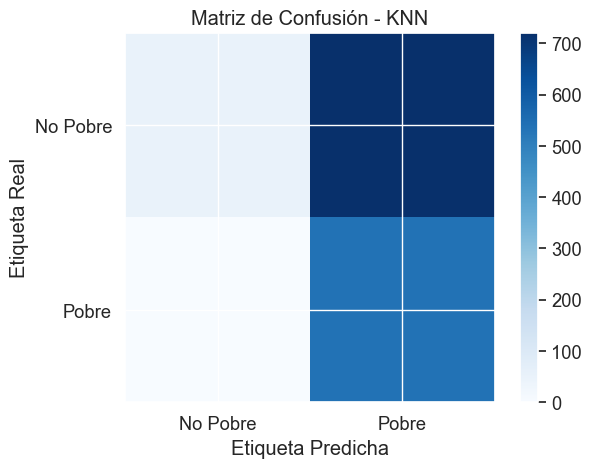

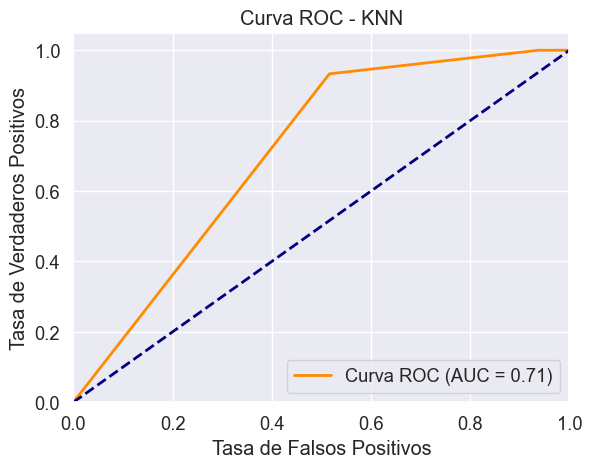

AUC (KNN con k=3): 0.7104452564819724
Precisión (Accuracy) (KNN con k=3): 0.44793261868300155


In [495]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Convertir variables categóricas en variables numéricas utilizando One-Hot Encoding
data_encoded = pd.get_dummies(respondieron)

# Separar las variables independientes (X) de la variable dependiente (y)
X = data_encoded.drop('pobre', axis=1)
y = data_encoded['pobre']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Imputar los valores faltantes utilizando la media de cada columna
imputer = SimpleImputer(strategy='mean') 
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Escalar los datos para mejorar la convergencia
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Regresión Logística
logit_model = LogisticRegression(max_iter=1000, penalty=None)
logit_model.fit(X_train_scaled, y_train)
y_pred_logit = logit_model.predict(X_test_scaled)
y_pred_proba_logit = logit_model.predict_proba(X_test_scaled)[:, 1]

# Matriz de Confusión
plot_confusion_matrix(y_test, y_pred_logit, title='Matriz de Confusión - Regresión Logística')

# Curva ROC y AUC
roc_auc_logit = plot_roc_curve(y_test, y_pred_proba_logit, title='Curva ROC - Regresión Logística')
print("AUC (Regresión Logística):", roc_auc_logit)
print("Precisión (Accuracy) (Regresión Logística):", accuracy_score(y_test, y_pred_logit))

# Análisis de Discriminante Lineal (LDA)
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_scaled, y_train)
y_pred_lda = lda_model.predict(X_test_scaled)
y_pred_proba_lda = lda_model.predict_proba(X_test_scaled)[:, 1]

# Matriz de Confusión
plot_confusion_matrix(y_test, y_pred_lda, title='Matriz de Confusión - LDA')

# Curva ROC y AUC
roc_auc_lda = plot_roc_curve(y_test, y_pred_proba_lda, title='Curva ROC - LDA')
print("AUC (Análisis de Discriminante Lineal):", roc_auc_lda)
print("Precisión (Accuracy) (Análisis de Discriminante Lineal):", accuracy_score(y_test, y_pred_lda))

# K-Vecinos más Cercanos (KNN) con k=3
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

# Matriz de Confusión
plot_confusion_matrix(y_test, y_pred_knn, title='Matriz de Confusión - KNN')

# Curva ROC y AUC
roc_auc_knn = plot_roc_curve(y_test, y_pred_proba_knn, title='Curva ROC - KNN')
print("AUC (KNN con k=3):", roc_auc_knn)
print("Precisión (Accuracy) (KNN con k=3):", accuracy_score(y_test, y_pred_knn))


In [497]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Convertir variables categóricas en variables numéricas utilizando One-Hot Encoding
data_encoded = pd.get_dummies(respondieron)

# Separar las variables independientes (X) de la variable dependiente (y)
X = data_encoded.drop('pobre', axis=1)
y = data_encoded['pobre']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Imputar los valores faltantes utilizando la media de cada columna
imputer = SimpleImputer(strategy='mean') 
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Escalar los datos para mejorar la convergencia
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Función para guardar la matriz de confusión como imagen
def save_confusion_matrix(y_true, y_pred, title='Matriz de Confusión', filename='confusion_matrix.png'):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Real')
    plt.xticks([0, 1], ['No Pobre', 'Pobre'])
    plt.yticks([0, 1], ['No Pobre', 'Pobre'])
    plt.savefig(filename, dpi=300, bbox_inches='tight')  # Guardar como imagen PNG con alta resolución
    plt.close()

# Función para guardar la curva ROC como imagen
def save_roc_curve(y_true, y_pred_proba, title='Curva ROC', filename='roc_curve.png'):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.savefig(filename, dpi=300, bbox_inches='tight')  # Guardar como imagen PNG con alta resolución
    plt.close()

# Regresión Logística
logit_model = LogisticRegression(max_iter=1000,penalty=None)
logit_model.fit(X_train_scaled, y_train)
y_pred_logit = logit_model.predict(X_test_scaled)
y_pred_proba_logit = logit_model.predict_proba(X_test_scaled)[:, 1]

# Guardar la matriz de confusión y la curva ROC de Regresión Logística
save_confusion_matrix(y_test, y_pred_logit, title='Matriz de Confusión - Regresión Logística', filename='confusion_matrix_logit.png')
save_roc_curve(y_test, y_pred_proba_logit, title='Curva ROC - Regresión Logística', filename='roc_curve_logit.png')

# Análisis de Discriminante Lineal (LDA)
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_scaled, y_train)
y_pred_lda = lda_model.predict(X_test_scaled)
y_pred_proba_lda = lda_model.predict_proba(X_test_scaled)[:, 1]

# Guardar la matriz de confusión y la curva ROC de LDA
save_confusion_matrix(y_test, y_pred_lda, title='Matriz de Confusión - LDA', filename='confusion_matrix_lda.png')
save_roc_curve(y_test, y_pred_proba_lda, title='Curva ROC - LDA', filename='roc_curve_lda.png')

# K-Vecinos más Cercanos (KNN) con k=3
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

# Guardar la matriz de confusión y la curva ROC de KNN
save_confusion_matrix(y_test, y_pred_knn, title='Matriz de Confusión - KNN', filename='confusion_matrix_knn.png')
save_roc_curve(y_test, y_pred_proba_knn, title='Curva ROC - KNN', filename='roc_curve_knn.png')

print("Exportación de matrices y curvas ROC completada.")


Exportación de matrices y curvas ROC completada.


## Ejercicio 5